**Requirement**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/Colab\ Notebooks/Praktikum_semester7/praktikum2/Prakitkum_NIM_Genap.zip -d /content/drive/MyDrive/Colab\ Notebooks/Praktikum_semester7/praktikum2/

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import pathlib
import os
import matplotlib.pyplot as plt
from sklearn.metrics import  classification_report
import pandas as pd

In [3]:
tf.random.set_seed(42)
np.random.seed(42)

IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32
EPOCHS = 50
NUM_CLASSES = 5
CLASSES = ["Boxer", "Dachshund", "Golden_Retriever", "Poodle", "Rottweiler"]
DATASET_PATH = "/content/drive/MyDrive/Prakitkum_NIM_Genap"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset = 'validation',
    label_mode='categorical',
    seed = 123,
    image_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE
)

Found 476 images belonging to 5 classes.
Found 476 files belonging to 5 classes.
Using 95 files for validation.


In [5]:
x, y = next(train_ds)
print("Images shape:", x.shape)

Images shape: (32, 224, 224, 3)


In [ ]:
class_map = dict([(v, k) for k, v in train_ds.class_indices.items()])
for key, value in class_map.items():
    print(f"{key} : {value}")

0 : Boxer
1 : Dachshund
2 : Golden_Retriever
3 : Poodle
4 : Rottweiler


In [6]:
model = Sequential([
   Rescaling(1./255, input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)),

   tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

   tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

   tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

   tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

   tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(units=512, activation='relu'),

   tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 111, 111, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 111, 111, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 55, 55, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 55, 55, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 27, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 27, 27, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 13, 13, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,5

 Total params: 2,661,253 (10.15 MB)

 Trainable params: 2,660,357 (10.15 MB)

 Non-trainable params: 896 (3.50 KB)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss =  'categorical_crossentropy',
    metrics = ['accuracy']
)

In [8]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=val_ds
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 237s 8s/step - accuracy: 0.3289 - loss: 5.1913 - val_accuracy: 0.1684 - val_loss: 1.7439
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 357ms/step - accuracy: 0.5318 - loss: 1.5774 - val_accuracy: 0.2842 - val_loss: 1.8922
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.7246 - loss: 0.8043 - val_accuracy: 0.2211 - val_loss: 2.2098
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 293ms/step - accuracy: 0.7947 - loss: 0.5558 - val_accuracy: 0.2632 - val_loss: 2.8062
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 365ms/step - accuracy: 0.8243 - loss: 0.5237 - val_accuracy: 0.1474 - val_loss: 2.7099
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.8520 - loss: 0.4119 - val_accuracy: 0.2316 - val_loss: 3.7033
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.8713 - loss: 0.3197 - val_accuracy: 0.1368 - val_loss: 4.6400
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 394ms/step - accuracy: 0.9008 - loss: 0.2894 - val_accuracy: 0.1579 - va

In [ ]:
result_data = pd.DataFrame(history.history)
result_data.tail()

,accuracy,loss,val_accuracy,val_loss
45,0.985294,0.030277,1.000000,0.000756
46,0.983193,0.050480,0.863158,0.517012
47,0.985294,0.084838,0.968421,0.065506
48,0.974790,0.075963,0.905263,0.353158
49,0.970588,0.109092,0.978947,0.040439


In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

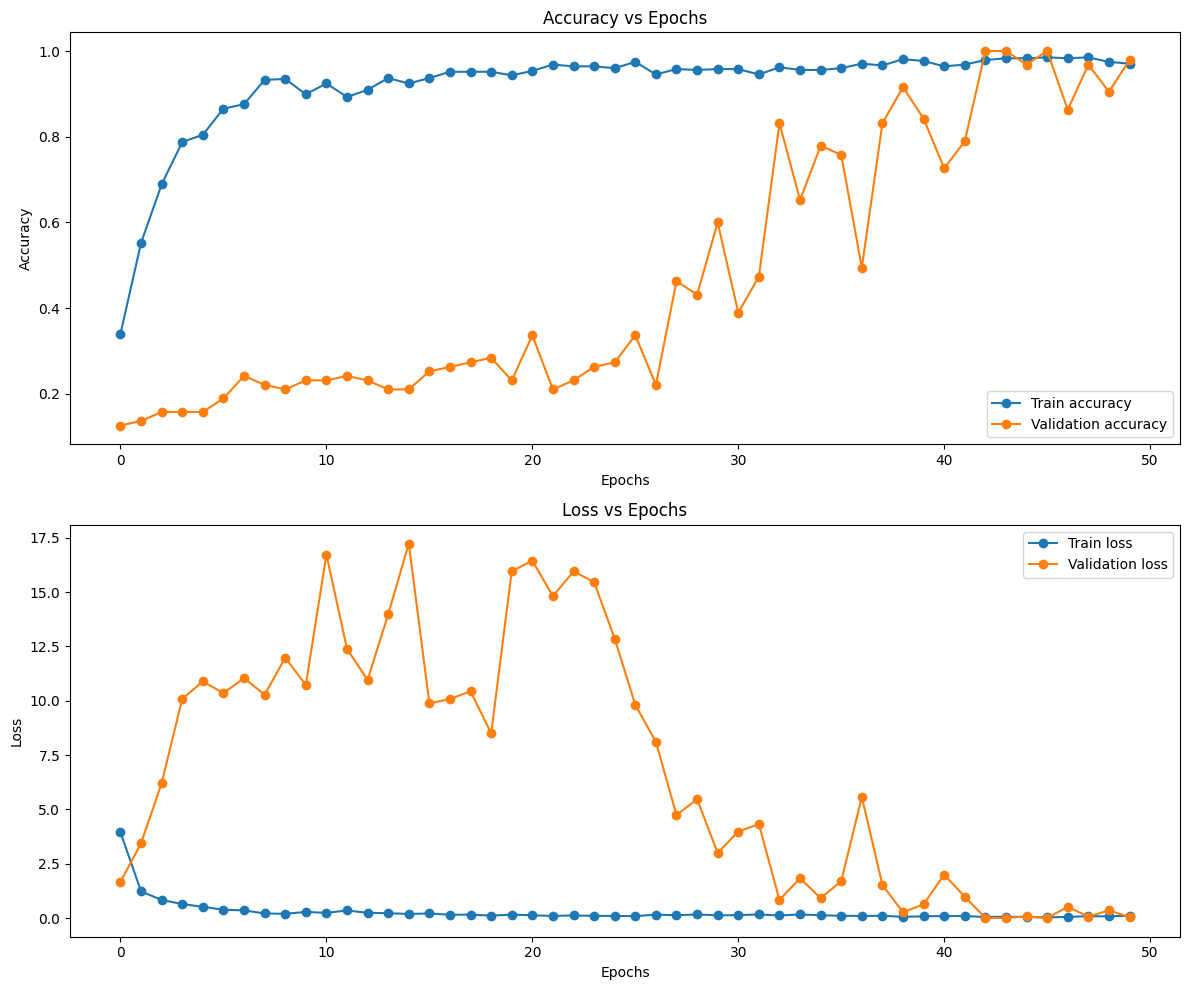

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Accuracy vs Epochs')
ax[0].plot(train_accuracy, '-o', label='Train accuracy')
ax[0].plot(val_accuracy, '-o', label='Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].set_title('Loss vs Epochs')
ax[1].plot(train_loss, '-o', label='Train loss')
ax[1].plot(val_loss, '-o', label='Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print("Test Accuracy: ", accuracy)
print("Test Loss :", loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9817 - loss: 0.0361
Test Accuracy:  0.9789473414421082
Test Loss : 0.04043864831328392


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_true = []
y_pred = []

for images, labels in val_ds:
  batch_predictions = model.predict(images)
  batch_pred_labels =  np.argmax(batch_predictions, axis=1)
  y_true.extend(np.argmax(labels.numpy(), axis=1)) # Convert y_true to multiclass
  y_pred.extend(batch_pred_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print(classification_report(y_true, y_pred, target_names=CLASSES))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
                  precision    recall  f1-score   support

           Boxer       1.00      0.91      0.95        22
       Dachshund       1.00      1.00      1.00        16
Golden_Retriever       0.88      1.00      0.94        15
          Poodle       1.00      1.00      1.00        25
      Rottweiler       1.00      1.00      1.00        17

        accuracy                           0.98        95
       macro avg       0.98      0.98      0.98        95
    weighted avg       0.98      0.98      0.98        95

